In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./datosLimpios2022.csv")

In [3]:
df

,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,via_tran,mot_viam,cont_res,cont_nac,cont_prod,pais_prod,pais_res,pro_jefm,jef_migr,edad,precio_pasaje
0,Salida,Ecuatorianos,2022,4,20,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,América,ARGENTINA,ARGENTINA,PICHINCHA,1,23,800.90
1,Entrada,Ecuatorianos,2022,5,26,Mujer,ECUADOR,Vía Aérea,Residencia,América,América,Europa,SUIZA SWITZERLAND,ECUADOR,PICHINCHA,1,68,1200.98
2,Salida,Ecuatorianos,2022,12,8,Hombre,ECUADOR,Vía Terrestre,Residencia,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,14,800.90
3,Salida,Ecuatorianos,2022,10,3,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,GUAYAS,12,71,800.90
4,Entrada,Ecuatorianos,2022,2,1,Mujer,ECUADOR,Vía Aérea,Residencia,Europa,América,Europa,ESPAÑA,ESPAÑA,PICHINCHA,1,38,1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,Entrada,Ecuatorianos,2022,8,14,Mujer,ECUADOR,Vía Terrestre,Residencia,América,América,América,PERU PERU,ECUADOR,EL ORO,9,15,800.90
9931,Salida,Ecuatorianos,2022,11,4,Mujer,ECUADOR,Vía Terrestre,Turismo,América,América,América,COLOMBIA,ECUADOR,CARCHI,11,60,800.90
9932,Salida,Ecuatorianos,2022,5,6,Mujer,ECUADOR,Vía Aérea,Turismo,América,América,América,MEXICO MEXICO,ECUADOR,PICHINCHA,1,30,800.90
9933,Salida,Ecuatorianos,2022,12,20,Hombre,ECUADOR,Vía Aérea,Turismo,América,América,América,ESTADOS UNIDOS USA,ECUADOR,PICHINCHA,1,71,800.90


In [4]:
dfentrada = df.loc[df["tip_movi"]== "Entrada", :]
dfsalida = df.loc[df["tip_movi"]== "Salida", :]

In [5]:
# Se puede identificar, en que meses hay mas cantidad de turistas y en que provincias

df1= dfentrada.loc[dfentrada["pais_res"]!= "ECUADOR", :].groupby("mes_movi")["tip_movi"].count().reset_index()

C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use

Text(0, 0.5, 'Total viajes')

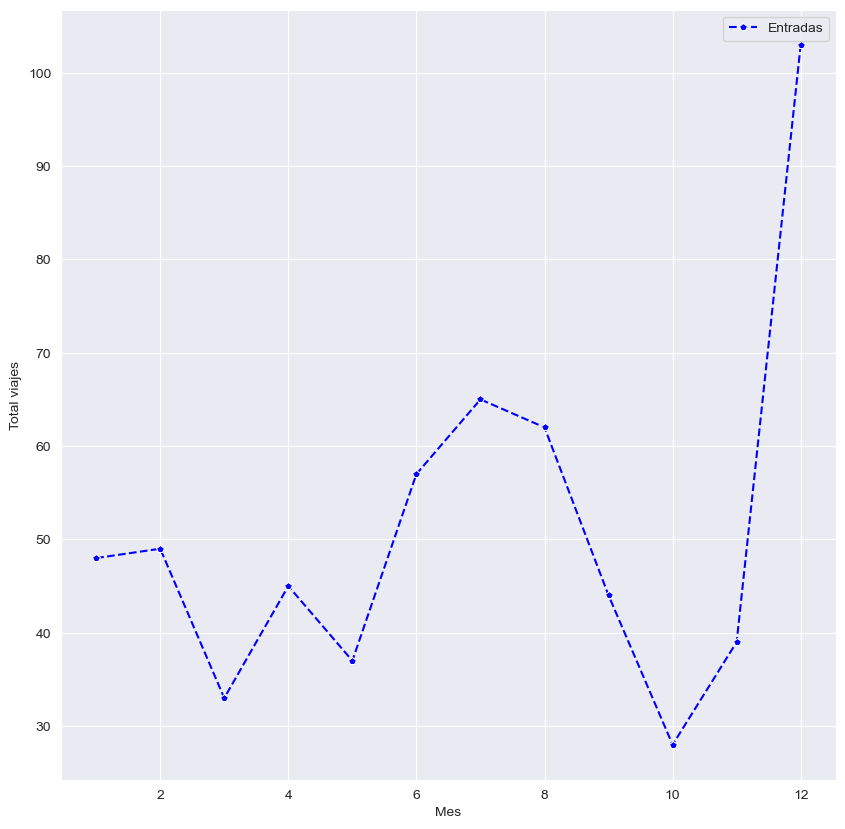

In [6]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df1, x="mes_movi",y="tip_movi", ax=ax, label="Entradas", color="b", marker="p",linestyle="--")
ax.set_xlabel("Mes")
ax.set_ylabel("Total viajes")

In [7]:
# Cual es le pais que visita mas a Ecuador y donde suelen visitar
df2= dfentrada.loc[dfentrada["pais_res"]!= "ECUADOR", :].groupby("pais_res")["tip_movi"].count().reset_index()
df2
# cont mas vsitado por ecuatoriano
df22= dfsalida.loc[dfsalida["tip_naci"]== "Ecuatorianos", :].groupby("cont_res")["tip_movi"].count().reset_index()
df22


,cont_res,tip_movi
0,América,6074
1,Asia,3
2,Europa,161
3,Oceanía,1
4,África,3


C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Continente')

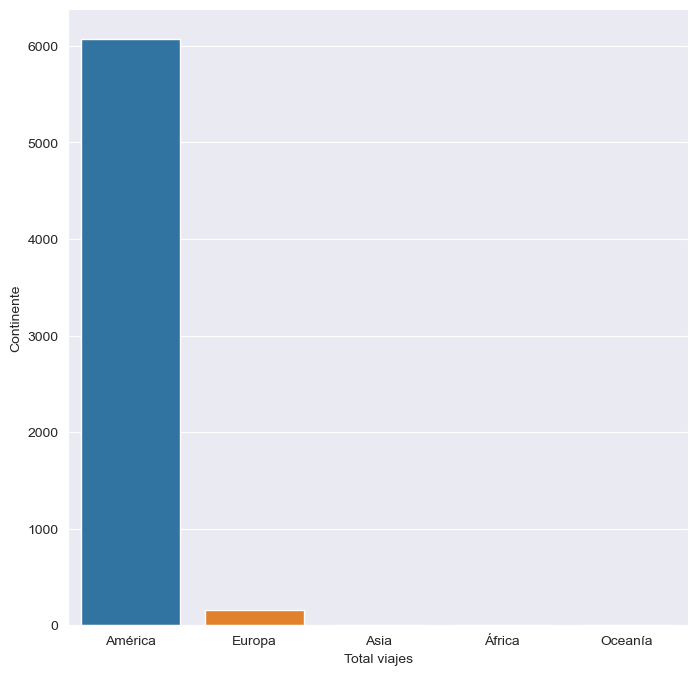

In [8]:
df22 = df22.sort_values(by="tip_movi", ascending=False)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(df22[0:10], x="cont_res",y="tip_movi", ax=ax,)
ax.set_xlabel("Total viajes")
ax.set_ylabel("Continente")


C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Pais')

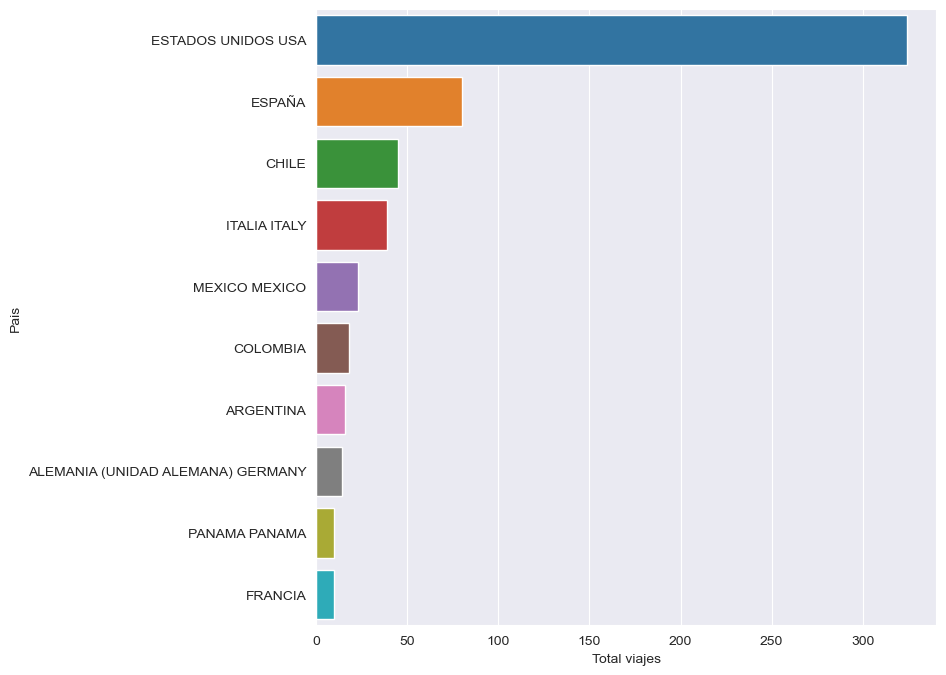

In [9]:
df23= dfsalida.loc[dfsalida["tip_naci"]== "Ecuatorianos",:]
df23= df23.loc[df23["pais_res"]!= "ECUADOR", :].groupby("pais_res")["tip_movi"].count().reset_index()
df23 = df23.sort_values(by="tip_movi", ascending=False)
df23
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(df23[0:10], y="pais_res",x="tip_movi", ax=ax,)
ax.set_xlabel("Total viajes")
ax.set_ylabel("Pais")

In [22]:
df23

,pais_res,tip_movi
14,ESTADOS UNIDOS USA,324
13,ESPAÑA,80
8,CHILE,45
21,ITALIA ITALY,39
23,MEXICO MEXICO,23
9,COLOMBIA,18
2,ARGENTINA,16
0,ALEMANIA (UNIDAD ALEMANA) GERMANY,14
25,PANAMA PANAMA,10
15,FRANCIA,10


In [10]:
df21= dfentrada.loc[dfentrada["pais_res"]== "ESTADOS UNIDOS USA", :].groupby("pro_jefm")["tip_movi"].count().reset_index()
df21

,pro_jefm,tip_movi
0,CARCHI,1
1,EL ORO,4
2,GUAYAS,207
3,PICHINCHA,101


C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Pais')

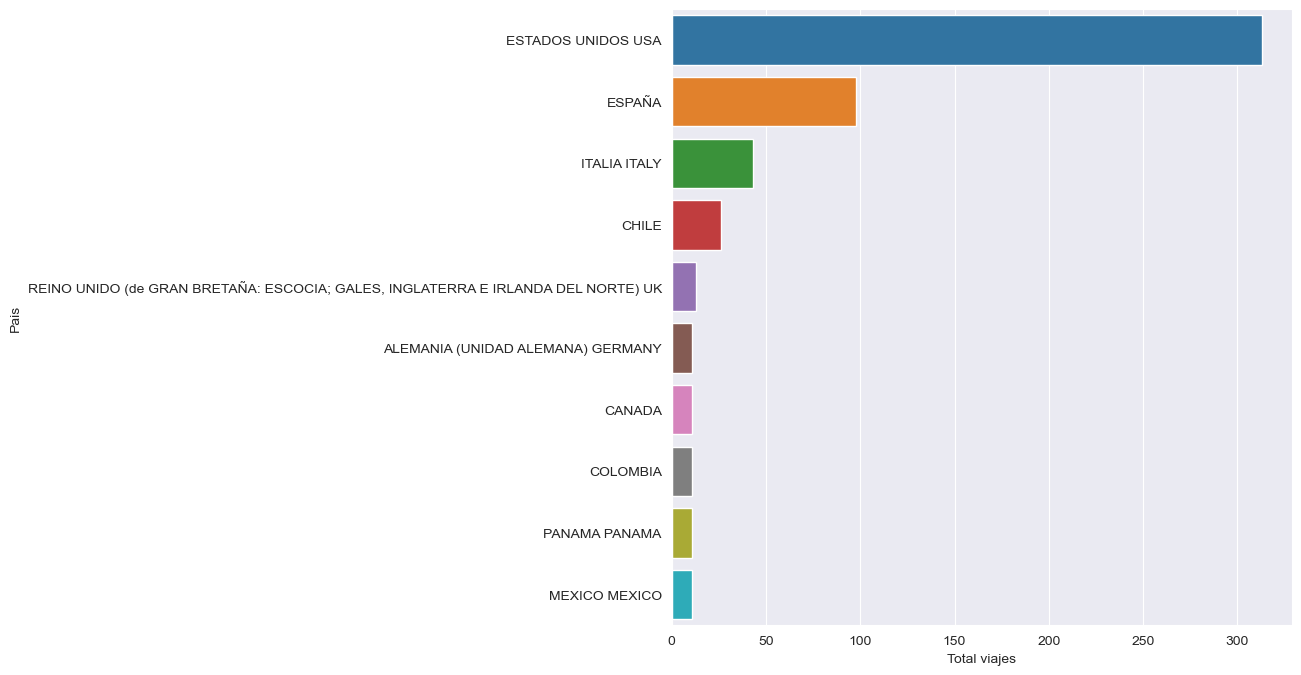

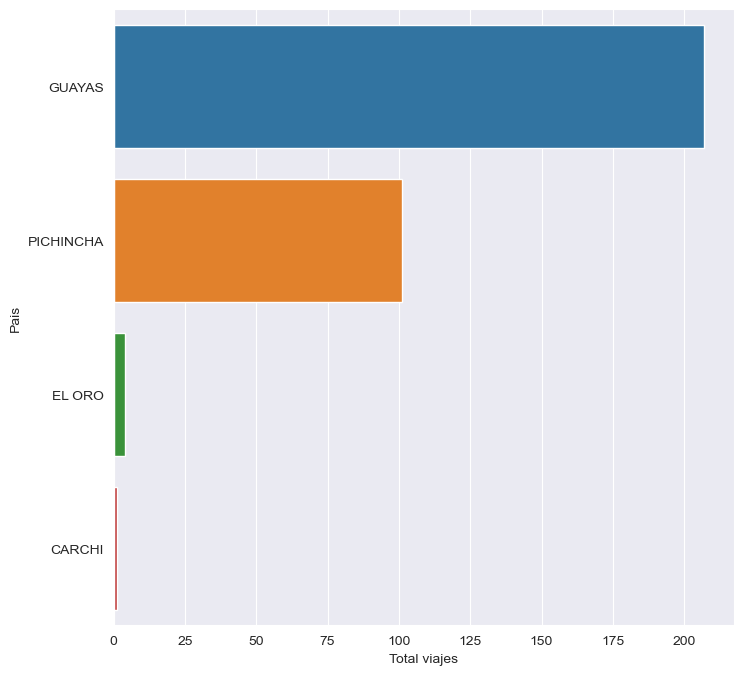

In [11]:
df2 = df2.sort_values(by="tip_movi", ascending=False)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(df2[0:10], y="pais_res",x="tip_movi", ax=ax,)
ax.set_xlabel("Total viajes")
ax.set_ylabel("Pais")

df21 = df21.sort_values(by="tip_movi", ascending=False)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(df21[0:10], y="pro_jefm",x="tip_movi", ax=ax,)
ax.set_xlabel("Total viajes")
ax.set_ylabel("Pais")

In [12]:
#3 Se puede saber si hay una relacion entre lo motivos de viaje entre extranjero y turistas
df3= dfentrada.loc[dfentrada["pais_res"]!= "ECUADOR", :].groupby("mot_viam")["tip_movi"].count().reset_index()
df3["Nacionalidad"] = "Extranjero"
df3

,mot_viam,tip_movi,Nacionalidad
0,Eventos,62,Extranjero
1,Otros,50,Extranjero
2,Residencia,420,Extranjero
3,Tripulación,1,Extranjero
4,Turismo,77,Extranjero


In [13]:
df31= dfentrada.loc[dfentrada["pais_res"]== "ECUADOR", :].groupby("mot_viam")["tip_movi"].count().reset_index()
df31["Nacionalidad"] = "Ecuatorianos"
df31


,mot_viam,tip_movi,Nacionalidad
0,Eventos,10,Ecuatorianos
1,Otros,7,Ecuatorianos
2,Residencia,3057,Ecuatorianos
3,Tripulación,4,Ecuatorianos
4,Turismo,5,Ecuatorianos


In [14]:
df3u = pd.concat([df3,df31])
df3u

,mot_viam,tip_movi,Nacionalidad
0,Eventos,62,Extranjero
1,Otros,50,Extranjero
2,Residencia,420,Extranjero
3,Tripulación,1,Extranjero
4,Turismo,77,Extranjero
0,Eventos,10,Ecuatorianos
1,Otros,7,Ecuatorianos
2,Residencia,3057,Ecuatorianos
3,Tripulación,4,Ecuatorianos
4,Turismo,5,Ecuatorianos


C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na

Text(0.5, 1.0, 'Comparacion de viajes al pais')

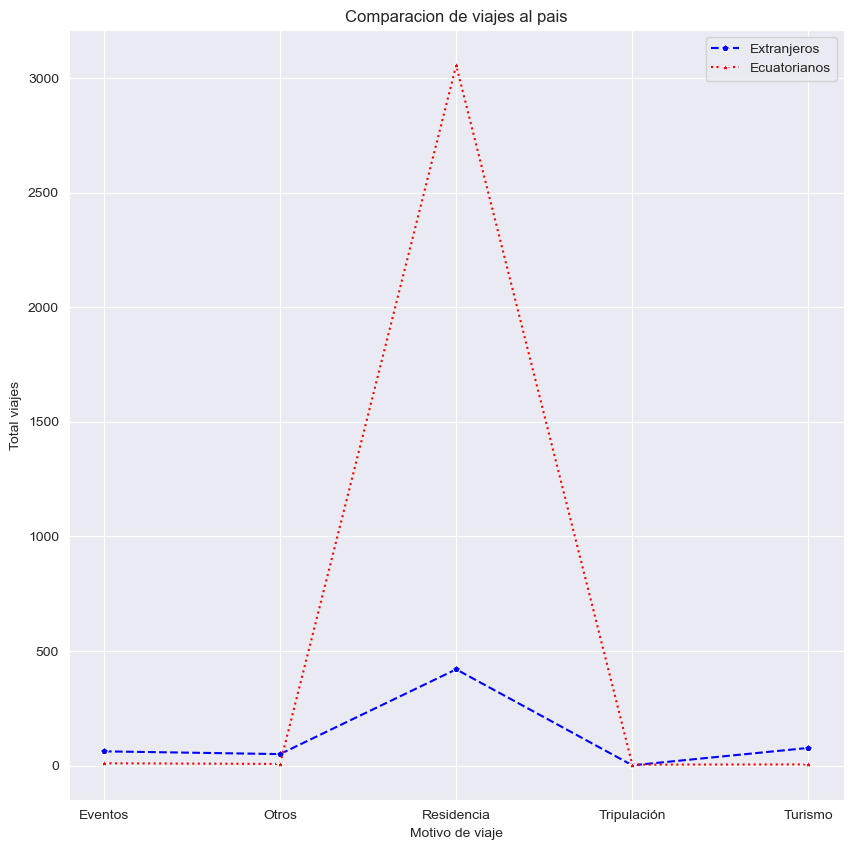

In [15]:
#sns.catplot(df3u, kind="bar", y="mot_viam",x="tip_movi", hue="Nacionalidad", errorbar="sd",palette="dark",alpha=.6, height=6)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df3, x="mot_viam",y="tip_movi", ax=ax, label="Extranjeros", color="b", marker="p",linestyle="--")
sns.lineplot(data=df31, x="mot_viam",y="tip_movi", ax=ax, label="Ecuatorianos",color="r", marker="*",linestyle=":")
ax.set_xlabel("Motivo de viaje")
ax.set_ylabel("Total viajes")
ax.set_title("Comparacion de viajes al pais")


In [16]:
#4  Cuales son los lugares mas visitados por motivo de turismo
df4= dfentrada.loc[dfentrada["mot_viam"]== "Turismo", :].groupby("pro_jefm")["tip_movi"].count().reset_index()
df4
df41= dfentrada.loc[dfentrada["mot_viam"]== "Eventos", :].groupby("pro_jefm")["tip_movi"].count().reset_index()
df41
df42= dfentrada.loc[dfentrada["mot_viam"]== "Otros", :].groupby("pro_jefm")["tip_movi"].count().reset_index()
df42
df43= dfentrada.loc[dfentrada["mot_viam"]== "Residencia", :].groupby("pro_jefm")["tip_movi"].count().reset_index()
df43

,pro_jefm,tip_movi
0,AZUAY,4
1,CARCHI,220
2,EL ORO,391
3,ESMERALDAS,2
4,GUAYAS,1569
5,LOJA,74
6,MANABI,3
7,PICHINCHA,1195
8,SANTA ELENA,1
9,SUCUMBIOS,13


C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Residencia')

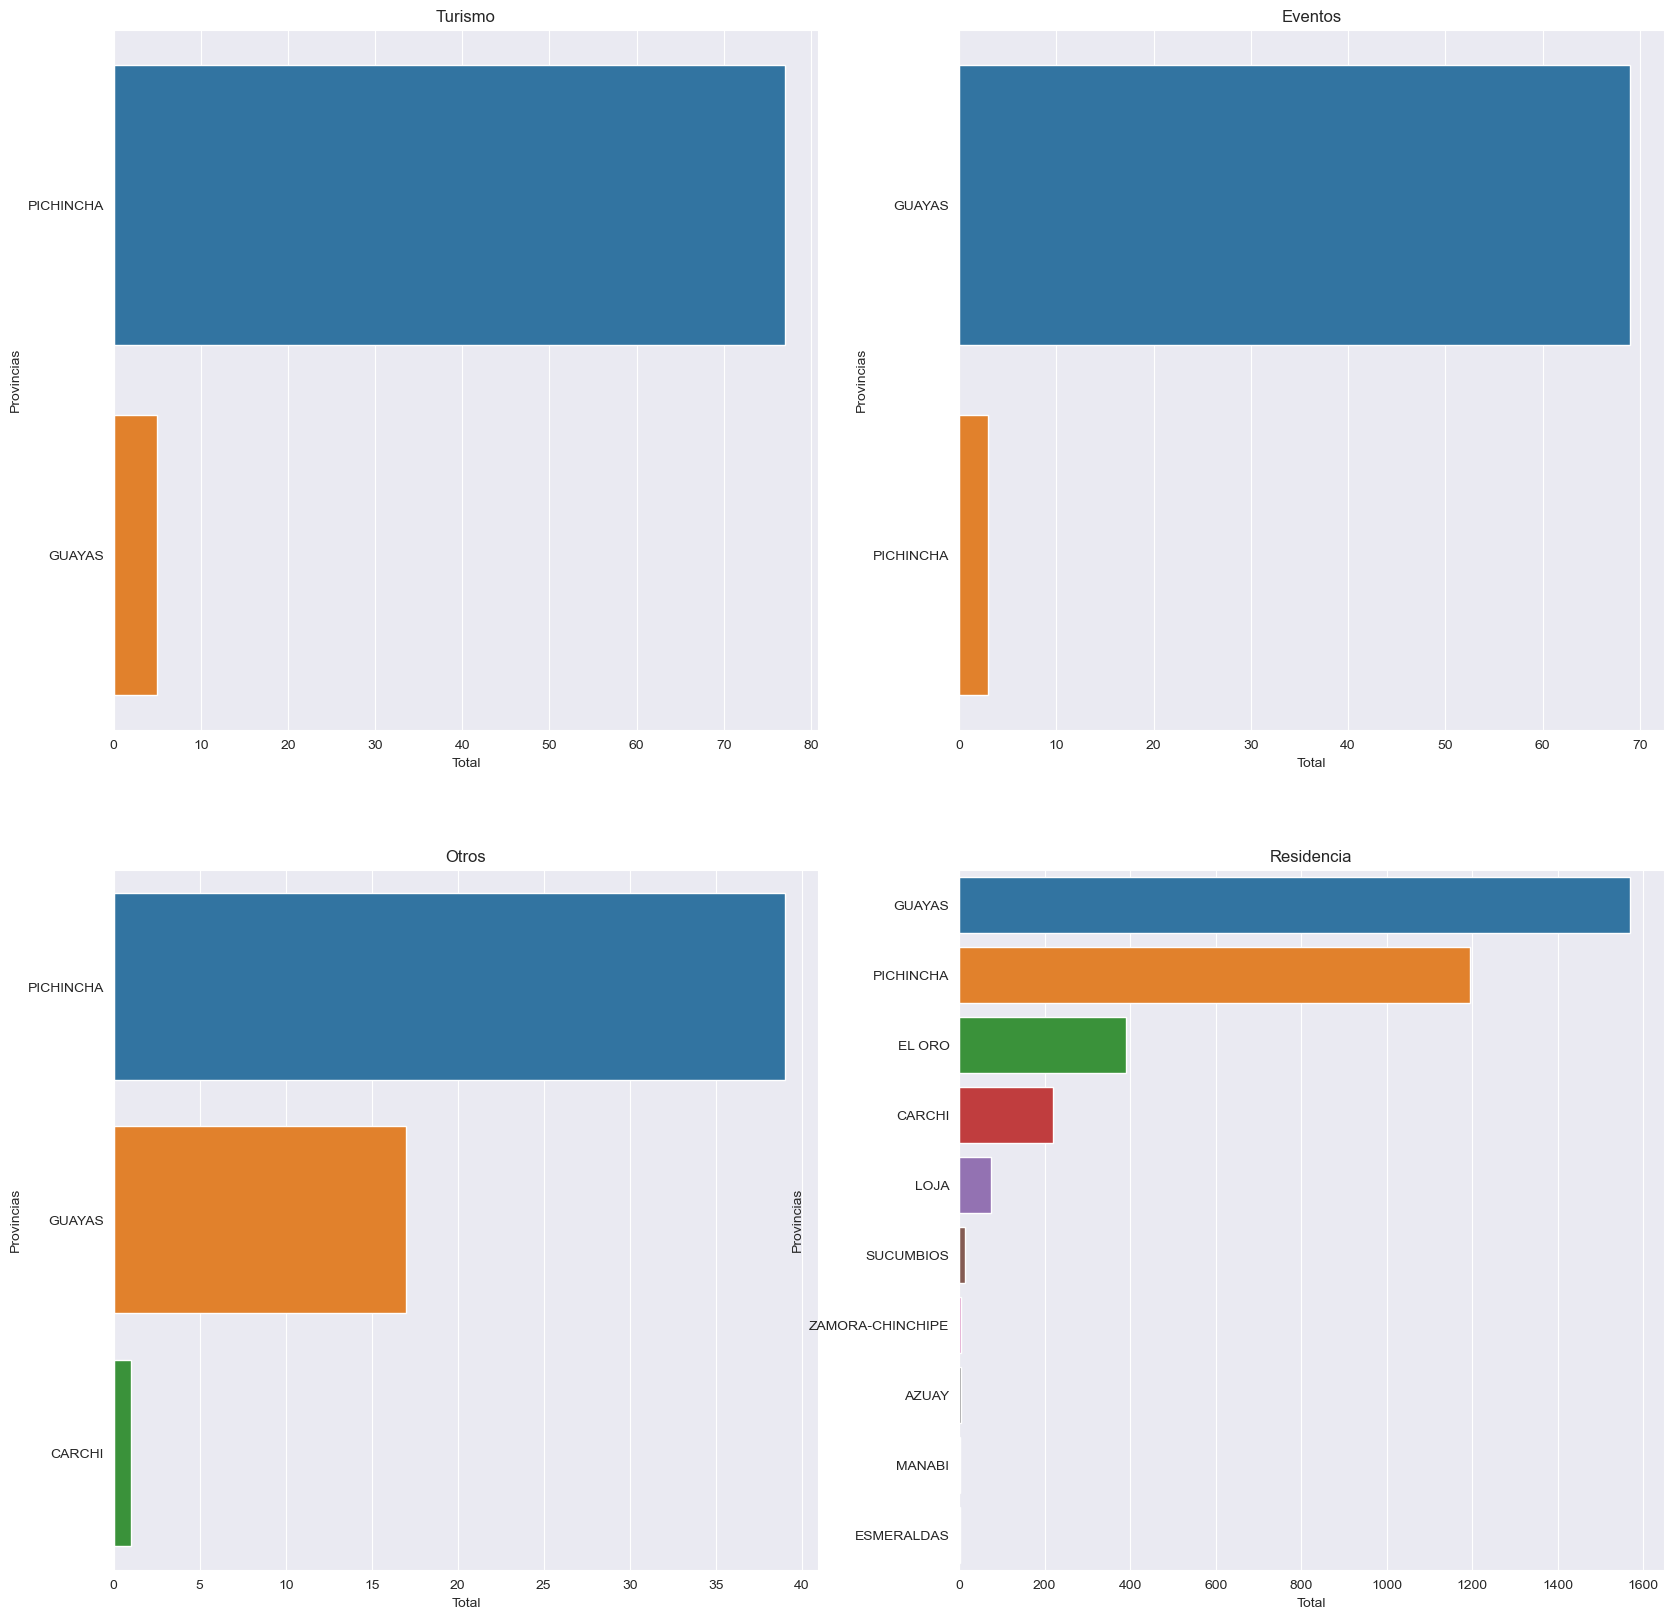

In [17]:
sns.set_style("darkgrid")
fig, axs = plt.subplots(2,2,figsize=(20,20))

df4 = df4.sort_values(by="tip_movi", ascending=False)
sns.set_style("darkgrid")
sns.barplot(df4[0:10], y="pro_jefm",x="tip_movi", ax=axs[0,0],)
axs[0,0].set_xlabel("Total")
axs[0,0].set_ylabel("Provincias")
axs[0,0].set_title("Turismo")

df41 = df41.sort_values(by="tip_movi", ascending=False)
sns.set_style("darkgrid")
sns.barplot(df41[0:10], y="pro_jefm",x="tip_movi", ax=axs[0,1],)
axs[0,1].set_xlabel("Total")
axs[0,1].set_ylabel("Provincias")
axs[0,1].set_title("Eventos")

df42 = df42.sort_values(by="tip_movi", ascending=False)
sns.set_style("darkgrid")
sns.barplot(df42[0:10], y="pro_jefm",x="tip_movi", ax=axs[1,0],)
axs[1,0].set_xlabel("Total")
axs[1,0].set_ylabel("Provincias")
axs[1,0].set_title("Otros")

df43 = df43.sort_values(by="tip_movi", ascending=False)
sns.set_style("darkgrid")
sns.barplot(df43[0:10], y="pro_jefm",x="tip_movi", ax=axs[1,1],)
axs[1,1].set_xlabel("Total")
axs[1,1].set_ylabel("Provincias")
axs[1,1].set_title("Residencia")

Text(0.5, 1.0, 'Ecuatorianos')

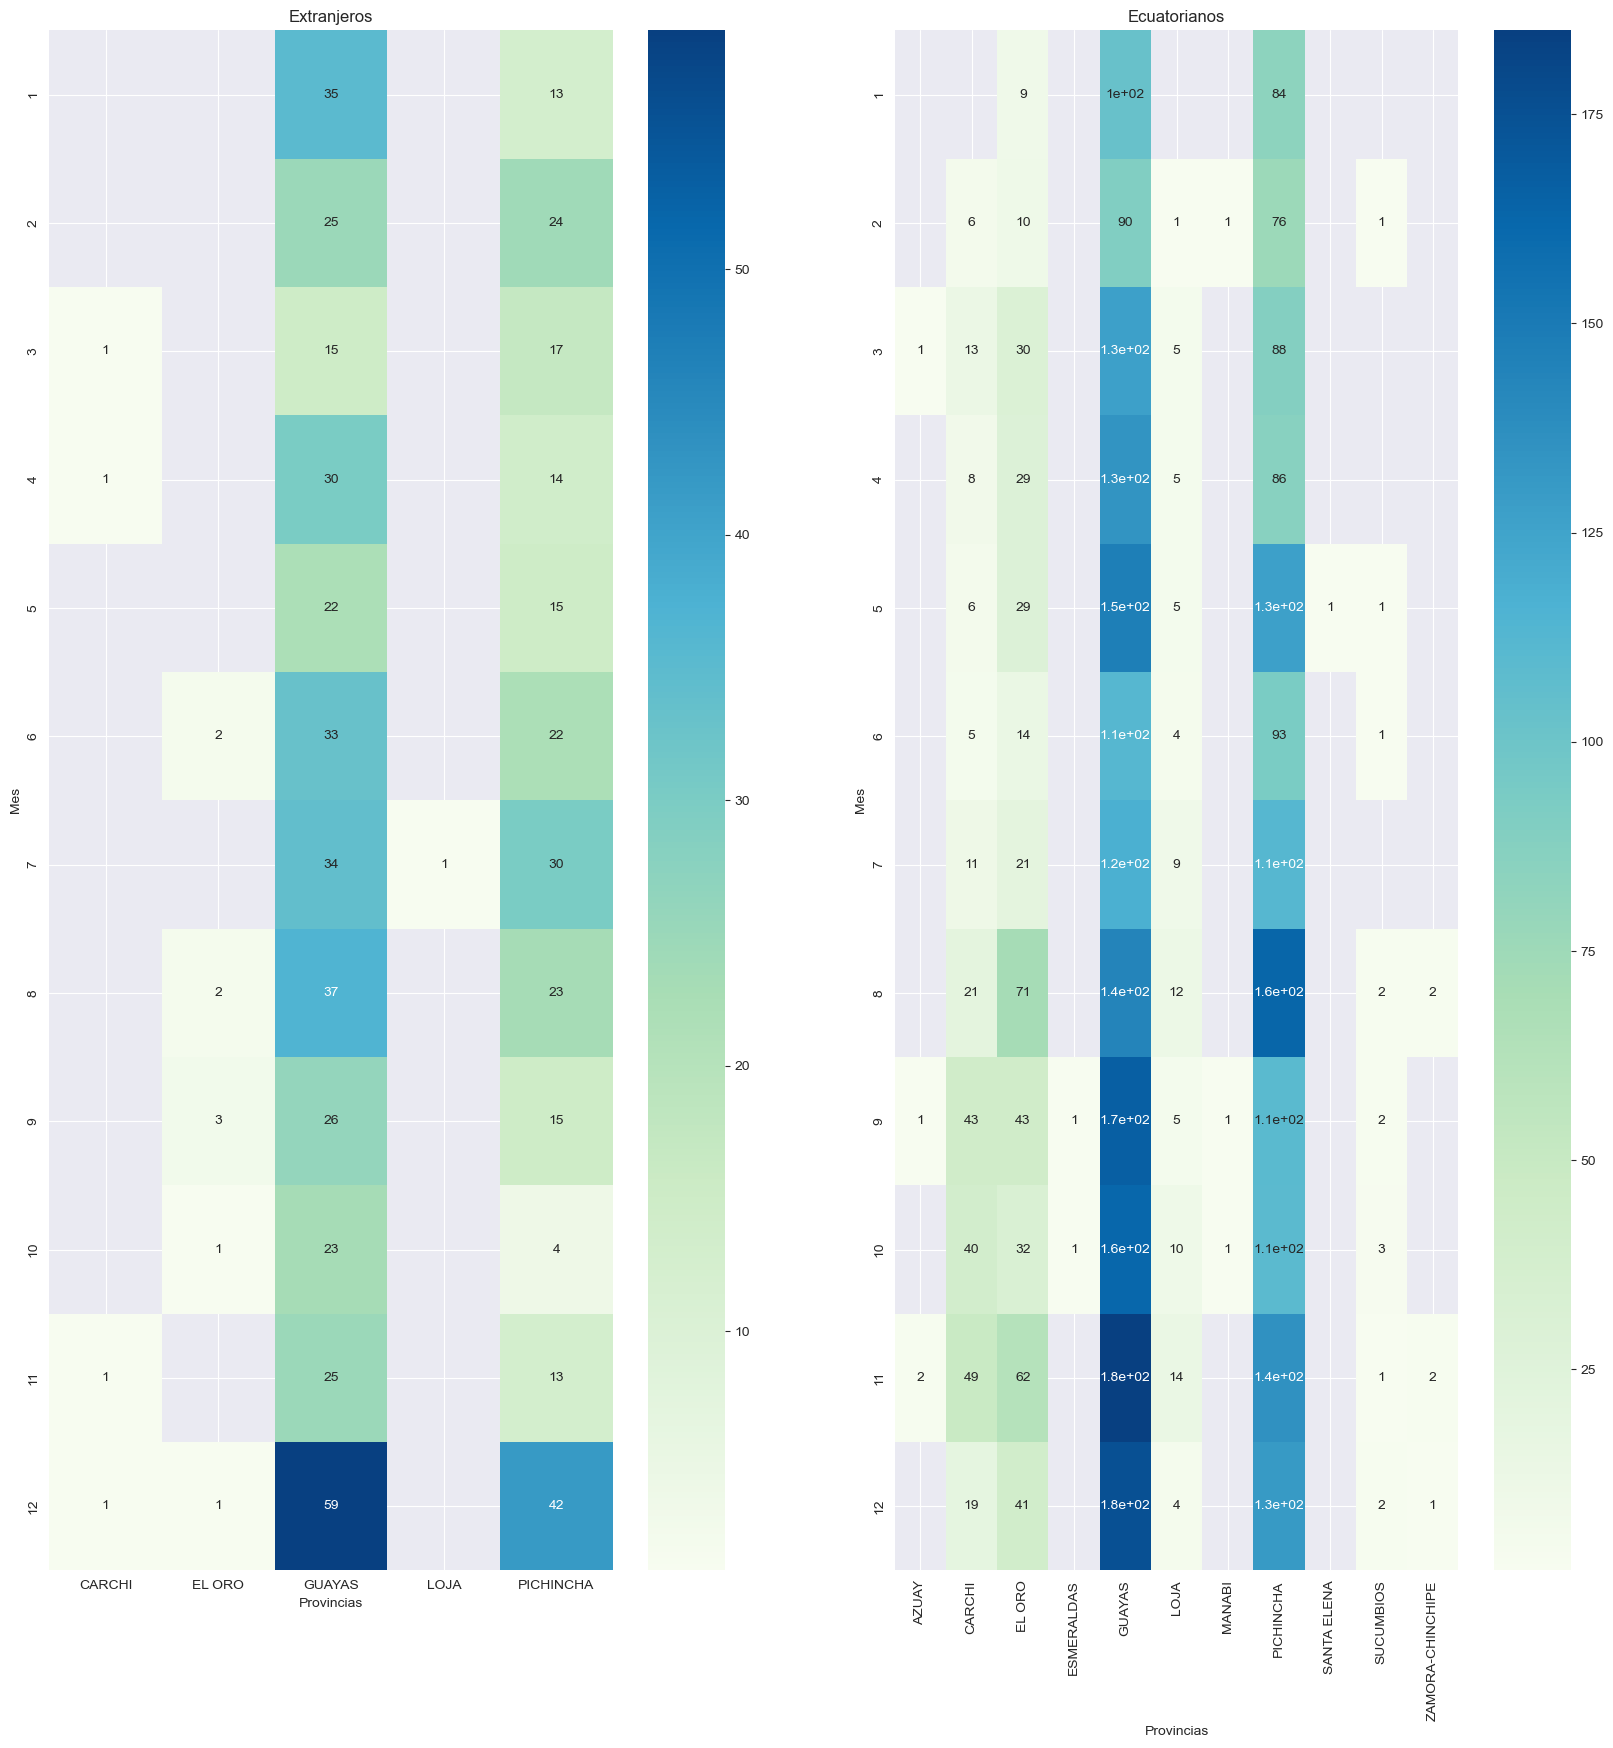

In [18]:
#5  Cuales son los lugares mas visitados ecuatorianos vs extranjeros
df5= dfentrada.loc[dfentrada["pais_res"]!= "ECUADOR", :]
dft = pd.pivot_table(df5, index= "mes_movi", columns="pro_jefm", values="tip_movi",aggfunc="count")
df51= dfentrada.loc[dfentrada["tip_naci"]== "Ecuatorianos", :]
dft1 = pd.pivot_table(df51, index= "mes_movi", columns="pro_jefm", values="tip_movi",aggfunc="count")

fig, ax = plt.subplots(1,2,figsize=(20,20))
sns.heatmap(dft,cmap="GnBu",ax=ax[0], annot=True, )
sns.heatmap(dft1,cmap="GnBu",ax=ax[1], annot=True, )
ax[0].set_ylabel("Mes")
ax[0].set_xlabel("Provincias")
ax[0].set_title("Extranjeros")

ax[1].set_ylabel("Mes")
ax[1].set_xlabel("Provincias")
ax[1].set_title("Ecuatorianos")

In [23]:
dft

pro_jefm,CARCHI,EL ORO,GUAYAS,LOJA,PICHINCHA
mes_movi,,,,,
1,NaN,NaN,35.0,NaN,13.0
2,NaN,NaN,25.0,NaN,24.0
3,1.0,NaN,15.0,NaN,17.0
4,1.0,NaN,30.0,NaN,14.0
5,NaN,NaN,22.0,NaN,15.0
6,NaN,2.0,33.0,NaN,22.0
7,NaN,NaN,34.0,1.0,30.0
8,NaN,2.0,37.0,NaN,23.0
9,NaN,3.0,26.0,NaN,15.0


In [24]:
dft1

pro_jefm,AZUAY,CARCHI,EL ORO,ESMERALDAS,GUAYAS,LOJA,MANABI,PICHINCHA,SANTA ELENA,SUCUMBIOS,ZAMORA-CHINCHIPE
mes_movi,,,,,,,,,,,
1,NaN,NaN,9.0,NaN,103.0,NaN,NaN,84.0,NaN,NaN,NaN
2,NaN,6.0,10.0,NaN,90.0,1.0,1.0,76.0,NaN,1.0,NaN
3,1.0,13.0,30.0,NaN,127.0,5.0,NaN,88.0,NaN,NaN,NaN
4,NaN,8.0,29.0,NaN,134.0,5.0,NaN,86.0,NaN,NaN,NaN
5,NaN,6.0,29.0,NaN,147.0,5.0,NaN,127.0,1.0,1.0,NaN
6,NaN,5.0,14.0,NaN,112.0,4.0,NaN,93.0,NaN,1.0,NaN
7,NaN,11.0,21.0,NaN,118.0,9.0,NaN,112.0,NaN,NaN,NaN
8,NaN,21.0,71.0,NaN,144.0,12.0,NaN,163.0,NaN,2.0,2.0
9,1.0,43.0,43.0,1.0,167.0,5.0,1.0,110.0,NaN,2.0,NaN


Text(0.5, 1.0, 'Ecuatorianos')

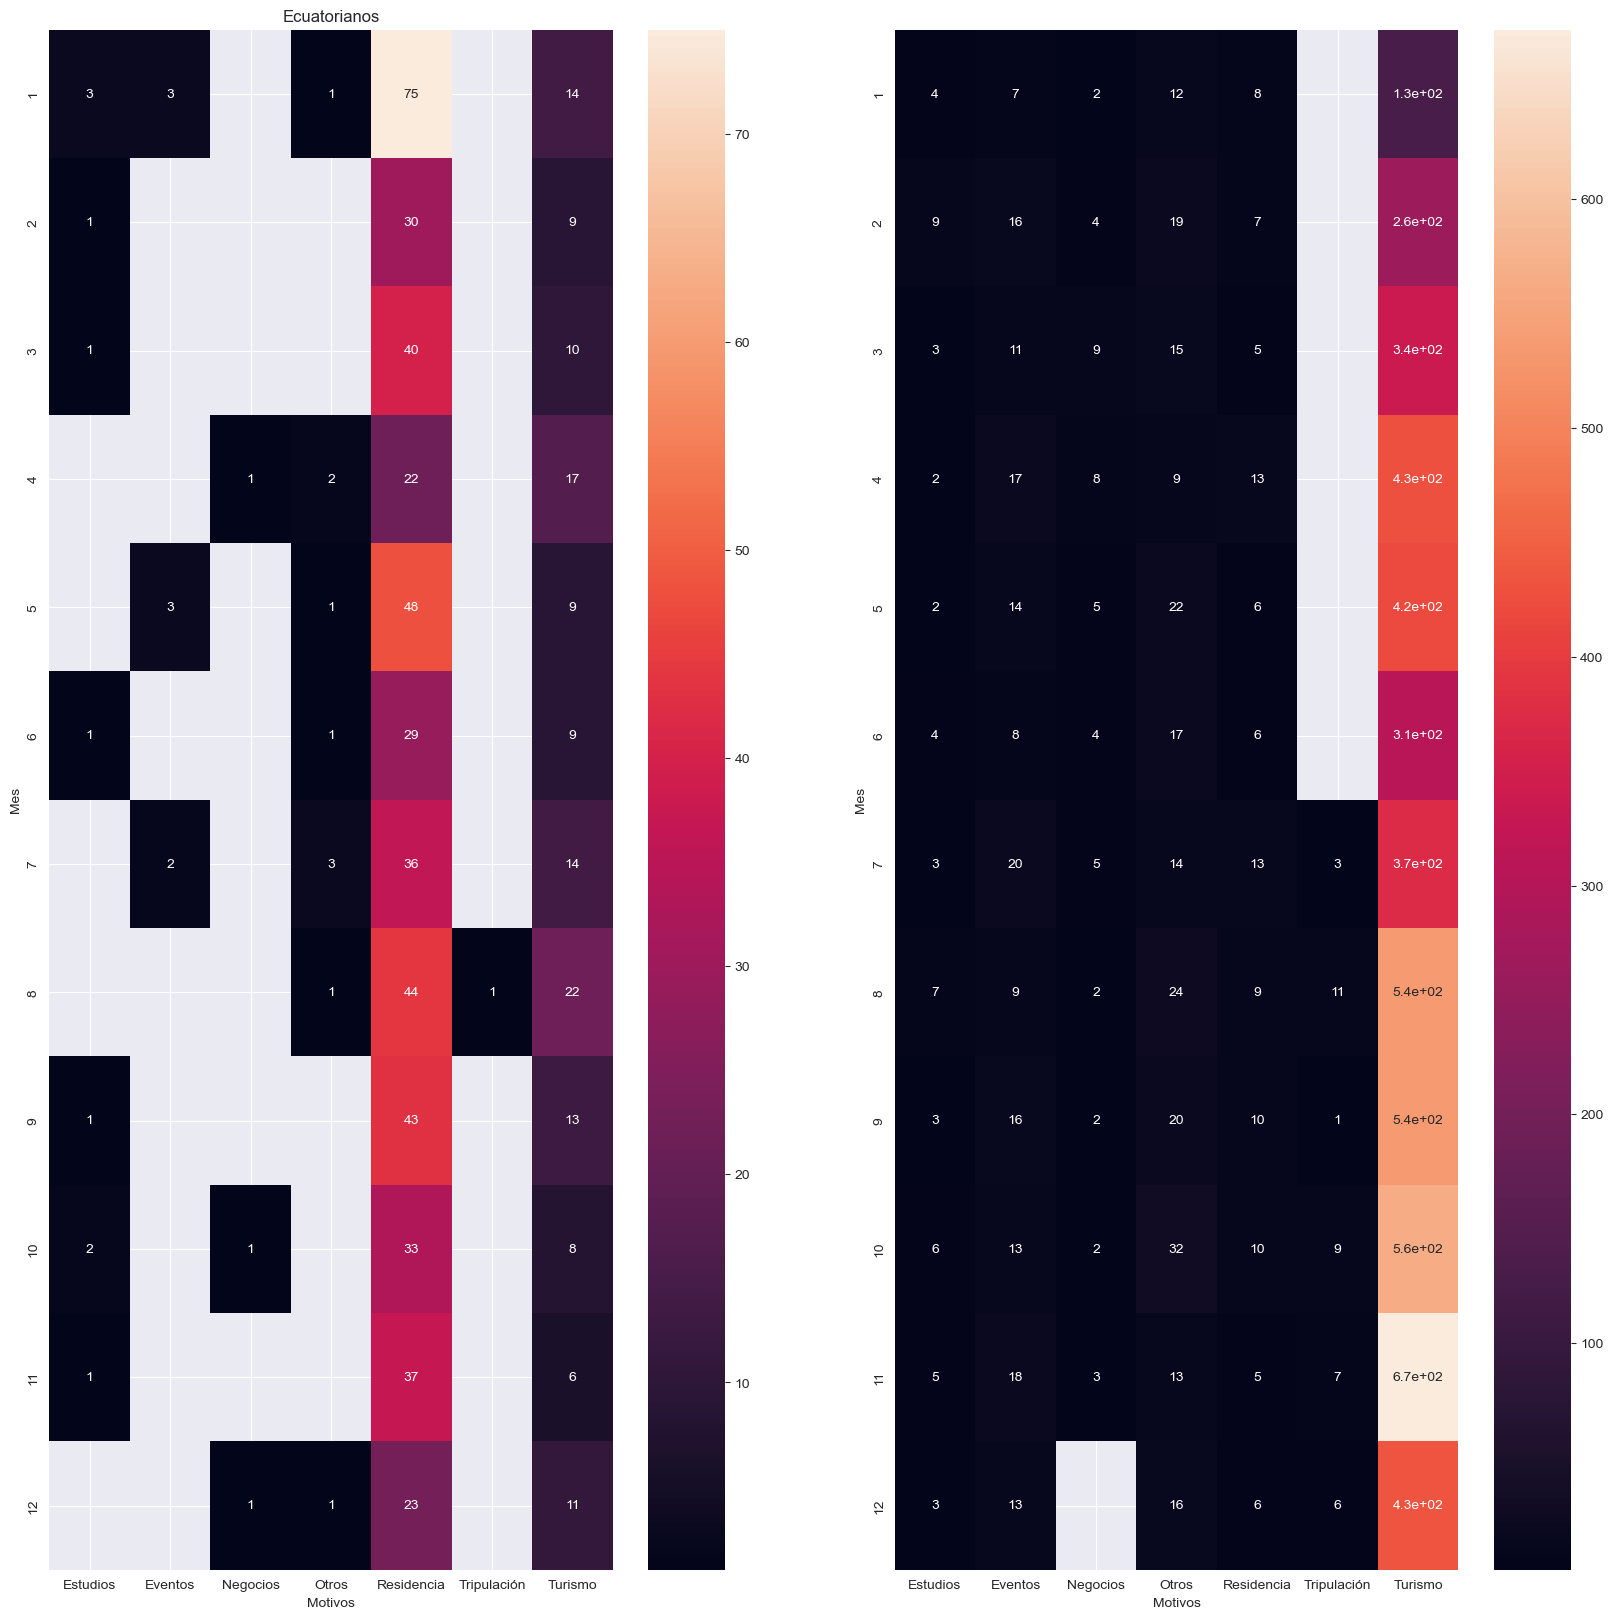

In [19]:
#6 -Mayor motivos de salida de ecuatorianos x lugar heat map
df6= dfsalida.loc[dfsalida["pais_res"]!= "ECUADOR", :]
dft6 = pd.pivot_table(df6, index= "mes_movi", columns="mot_viam", values="tip_movi",aggfunc="count")
df61= dfsalida.loc[dfsalida["pais_res"]== "ECUADOR", :]
dft61 = pd.pivot_table(df61, index= "mes_movi", columns="mot_viam", values="tip_movi",aggfunc="count")

fig, ax = plt.subplots(1,2,figsize=(20,20))
sns.heatmap(dft6,ax=ax[0], annot=True, )
sns.heatmap(dft61,ax=ax[1], annot=True,)

ax[0].set_ylabel("Mes")
ax[0].set_xlabel("Motivos")
ax[0].set_title("Extranjeros")

ax[1].set_ylabel("Mes")
ax[1].set_xlabel("Motivos")
ax[0].set_title("Ecuatorianos")

In [20]:
#7 Realacion entrada y Salida por mes
df7= dfentrada.loc[dfentrada["pais_res"]!= "ECUADOR", :].groupby("mes_movi")["tip_movi"].count().reset_index()
df7["Viajes"] = "Entrada"

df71= dfentrada.loc[dfentrada["pais_res"]!= "ECUADOR", :].groupby("mes_movi")["tip_movi"].count().reset_index()
df71["Viajes"] = "Entrada"

df72= dfsalida.loc[dfsalida["pais_res"]!= "ECUADOR", :].groupby("mes_movi")["tip_movi"].count().reset_index()
df72["Viajes"] = "Salida"

df73= dfsalida.loc[dfsalida["pais_res"]!= "ECUADOR", :].groupby("mes_movi")["tip_movi"].count().reset_index()
df73["Viajes"] = "Salida"

dfu7 =pd.concat([df7,df73])
dfu71 = pd.concat([df71,df72])




C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Damian\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


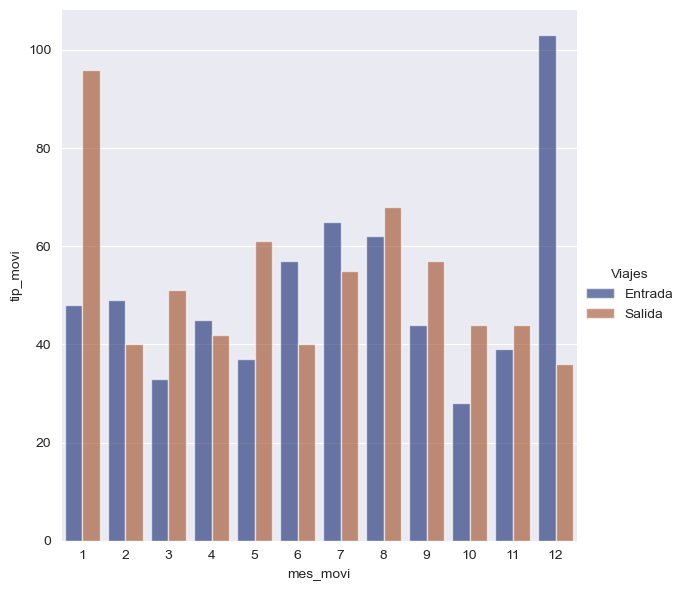

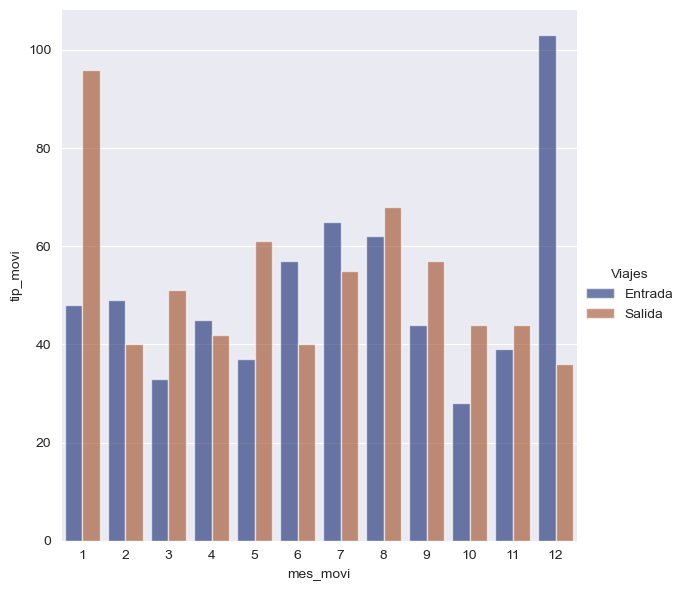

In [21]:

sns.catplot(dfu7, kind="bar", x="mes_movi",y="tip_movi", hue="Viajes", errorbar="sd",palette="dark",alpha=.6, height=6)
ax[0].set_ylabel("Mes")
ax[0].set_xlabel("Motivos")
ax[0].set_title("Extranjeros")

sns.catplot(dfu71, kind="bar", x="mes_movi",y="tip_movi", hue="Viajes", errorbar="sd",palette="dark",alpha=.6, height=6)